In [1]:
from sklearn import datasets, model_selection, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [2]:
##Prepare data##

filename=r'arvostukset_v4.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')
data_train=data_train.drop(['ID'], axis=1)
data_train=data_train.dropna()
data_train['Sukupuoli'].replace(to_replace=['M'], value=0,inplace=True)
data_train['Sukupuoli'].replace(to_replace=['N'], value=1,inplace=True)

#print(data_train.head(10))
#df.head()

print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.describe().to_excel(r'original_Describe.xlsx')


DESCRIBE DATA:
        Urheilu ja liikunta  Baarit ja klubit  Kirjallisuus     Musiikki  \
count          1000.000000       1000.000000   1000.000000  1000.000000   
mean              5.917000          5.942000      4.720000     6.096000   
std               2.409962          2.472397      2.534566     2.554077   
min               0.000000          0.000000      0.000000     0.000000   
25%               4.000000          4.000000      3.000000     4.000000   
50%               6.000000          6.000000      5.000000     6.000000   
75%               8.000000          8.000000      7.000000     8.000000   
max              10.000000         10.000000     10.000000    10.000000   

       Perhe ja suku       Luonto     Mokkeily     Sisustus     Matkailu  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean        5.972000     4.973000     5.873000     5.811000     5.901000   
std         2.608835     2.185188     2.509416     2.510295     2.526971   
min

In [3]:
###Scaling the data###

from sklearn.preprocessing import StandardScaler
colnames = data_train.columns.get_values()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_train))
#df_scaled.head()
print('\nDESCRIBE SCALED DATA:\n',df_scaled.describe())
df_scaled.min()
df_scaled.max()
print('\nSCALED DATA:\n',df_scaled.head(10))
df_scaled.to_excel(r'df_scaled.xlsx')

described_df=df_scaled.describe()
described_df.to_excel(r'df_scaled_Describe.xlsx')



DESCRIBE SCALED DATA:
                  0             1             2             3             4   \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   8.837375e-17  6.106227e-19  1.081357e-16 -4.285461e-17 -6.383782e-17   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -2.456454e+00 -2.404538e+00 -1.863184e+00 -2.387967e+00 -2.290289e+00   
25%   -7.958461e-01 -7.858655e-01 -6.789568e-01 -8.210595e-01 -7.562711e-01   
50%    3.445760e-02  2.347075e-02  1.105278e-01 -3.760578e-02  1.073813e-02   
75%    8.647613e-01  8.328070e-01  9.000125e-01  7.458479e-01  7.777473e-01   
max    1.695065e+00  1.642143e+00  2.084239e+00  1.529302e+00  1.544757e+00   

                 5             6             7             8             9   \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   7.988055e-17 -8.104628e-17  7.893686e-17  7.699397e-17  1.504352e-16   
std    1.000500e+00  1.0005

In [4]:
###K-Means clustering###FIT AND PREDICT
from sklearn import cluster
num_clusters = 3

kmeans = cluster.KMeans(n_clusters=num_clusters,random_state=1,max_iter=1000)
kmeans.fit(df_scaled)
predict=kmeans.predict(df_scaled)



centroids = kmeans.cluster_centers_
#print(kmeans.predict(1)

In [5]:
###Cluster item count###
print("CLUSTER ITEM COUNT:")
print("Cluster 0 =",np.sum(predict==0))
print("Cluster 1 =",np.sum(predict==1))
print("Cluster 2 =",np.sum(predict==2))
print("Cluster 3 =",np.sum(predict==3))

CLUSTER ITEM COUNT:
Cluster 0 = 357
Cluster 1 = 379
Cluster 2 = 264
Cluster 3 = 0


In [6]:
# create a pandas data frame with columns
centroids_df = pd.DataFrame(centroids, columns=colnames)
print('\nCLUSTER CENTROIDS:\n',centroids_df)
centroids_df.to_excel(r'centroids.xlsx')


CLUSTER CENTROIDS:
    Urheilu ja liikunta  Baarit ja klubit  Kirjallisuus  Musiikki  \
0            -0.867945         -0.360794     -0.725397 -0.742056   
1             0.372932         -0.167652      0.539641  0.342752   
2             0.638315          0.728574      0.206223  0.511405   

   Perhe ja suku    Luonto  Mokkeily  Sisustus  Matkailu  Kasityot  \
0      -0.692891 -0.646847 -0.824938 -0.824500 -0.258027 -0.722618   
1       0.861734  0.878543  0.931138  0.841949 -0.126905  0.942733   
2      -0.300133 -0.386527 -0.221205 -0.093758  0.531108 -0.376216   

   Muoti ja vaatteet  Kuukausitulo  Sukupuoli  
0           0.347158     -0.515227   0.282355  
1          -0.066485      0.037073   0.084078  
2          -0.374006      0.643505  -0.502523  


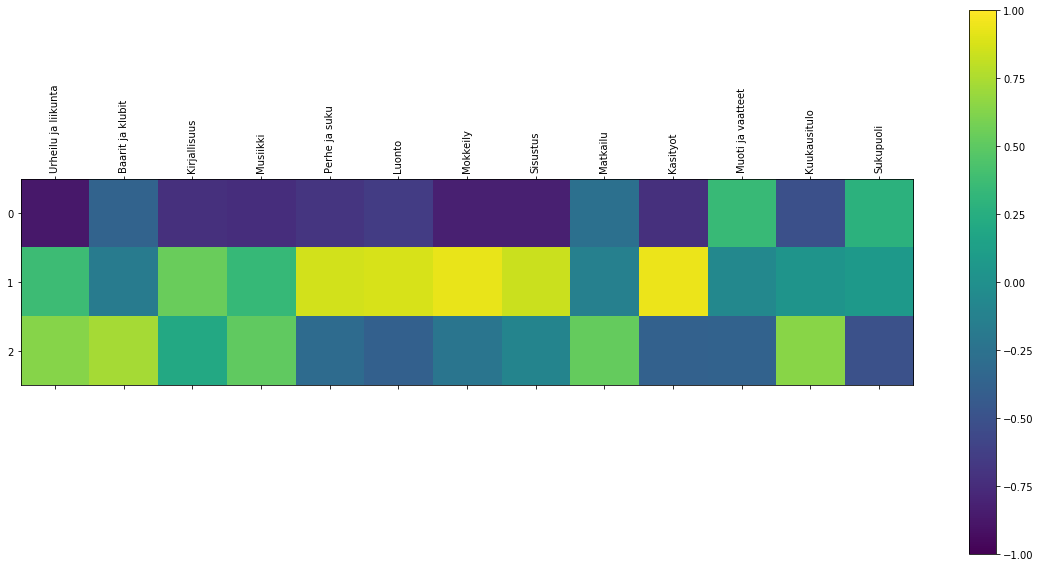

In [7]:
###Starting to make Figures###

#inversed = scaler.inverse_transform(centroids_df)
#print(inversed)

# visualize with matplotlib
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(centroids_df, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(colnames),1)
ax.set_xticks(ticks)
#ax.set_yticks(ticks)
ax.set_xticklabels(colnames)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
#ax.set_yticklabels(cnames)
plt.savefig('heatmap_arvostukset_clusters_'+str(num_clusters)+'.png',bbox_inches='tight')
plt.show()


In [8]:
###Preparing for elbowMethod###
Sum_of_squared_data = []
K = range(1,7)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    Sum_of_squared_data.append(km.inertia_)

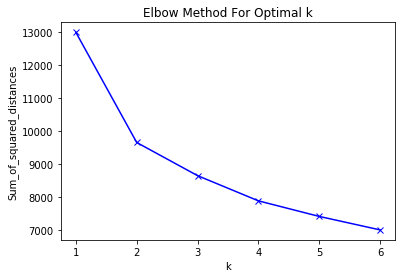

In [9]:
plt.plot(K, Sum_of_squared_data, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

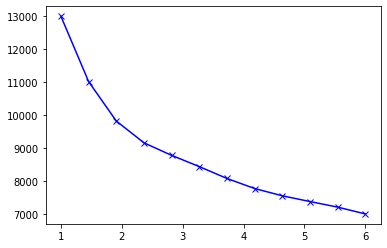

In [10]:
from scipy.interpolate import make_interp_spline, BSpline

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(1, 6, 12) 

spl = make_interp_spline(K, Sum_of_squared_data, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth,'bx-')
plt.savefig('ElbowMethod_arvostukset_clusters_'+str(num_clusters)+'.png',bbox_inches='tight')
plt.show()

In [11]:
###Original data with clusters###save to Excel

#Inverse scaled data
#inversed_df = scaler.inverse_transform(df_scaled)


#invert_df = pd.DataFrame(inversed_df, columns=colnames)
data_train['Cluster'] = pd.DataFrame(predict, index=df_scaled.index)
data_train.to_excel(r'original_data_with_clusters.xlsx')
print('\nORIGINAL DATA WITH CLUSTER INDEX:\n',data_train.head(10))


ORIGINAL DATA WITH CLUSTER INDEX:
    Urheilu ja liikunta  Baarit ja klubit  Kirjallisuus  Musiikki  \
0                    5                 4             6         9   
1                    6                 8             4         8   
2                    5                 8             2         3   
3                    5                 8             4         6   
4                    5                 8             1         4   
5                    4                 5             5         7   
6                    8                 6             5        10   
7                    9                10             5         4   
8                   10                 8             7        10   
9                    7                 8             3         3   

   Perhe ja suku  Luonto  Mokkeily  Sisustus  Matkailu  Kasityot  \
0              8       7         8         9         2         6   
1              4       0         5         6         5         0   
2          